In [2863]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing  import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import MinMaxScaler

df=pd.read_csv("ElecDeviceRatingPrediction.csv")
electro = df.copy()
electro.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Pentium Quad,Not Available,4 GB,LPDDR4X,0 GB,512 GB,64-bit Windows,0 GB,Casual,No warranty,No,No,45990,3 stars,0,0
1,ASUS,Intel,Core i5,10th,8 GB,LPDDR4,0 GB,512 GB,32-bit DOS,4 GB,Casual,No warranty,No,No,106167,4 stars,1881,241
2,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,64-bit Windows,0 GB,Casual,No warranty,No,No,22990,3 stars,0,0
3,Lenovo,Intel,Core i3,11th,4 GB,DDR4,256 GB,0 GB,64-bit Windows,0 GB,Casual,1 year,No,Yes,44990,4 stars,42,4
4,HP,AMD,Ryzen 7,Not Available,16 GB,DDR4,512 GB,0 GB,64-bit Windows,2 GB,Casual,1 year,No,Yes,79990,3 stars,23,6


In [2864]:
#check the datatypes
electro.dtypes

brand                object
processor_brand      object
processor_name       object
processor_gnrtn      object
ram_gb               object
ram_type             object
ssd                  object
hdd                  object
os                   object
graphic_card_gb      object
weight               object
warranty             object
Touchscreen          object
msoffice             object
Price                 int64
rating               object
Number of Ratings     int64
Number of Reviews     int64
dtype: object

In [2865]:
electro['ram_gb']=electro['ram_gb'].str.strip('GB')
#electro['ram_gb']=electro['ram_gb'].astype('int')


In [2866]:
#electro['ram_type - ram_gb'] = electro['ram_gb'] + electro['ram_type']

In [2867]:
#electro['ram_type - ram_gb'].unique()

In [2868]:
#electro['ram_type - ram_gb'] = electro['ram_type - ram_gb'].astype('category')

In [2869]:
electro.dtypes

brand                object
processor_brand      object
processor_name       object
processor_gnrtn      object
ram_gb               object
ram_type             object
ssd                  object
hdd                  object
os                   object
graphic_card_gb      object
weight               object
warranty             object
Touchscreen          object
msoffice             object
Price                 int64
rating               object
Number of Ratings     int64
Number of Reviews     int64
dtype: object

In [2870]:
mode_value = electro['processor_gnrtn'].mode()[0]
print(mode_value)

11th


In [2871]:
#convert to the correct datatype
electro['Touchscreen']=electro['Touchscreen'].astype('category')
electro['msoffice']=electro['msoffice'].astype('category')
electro['rating']=electro['rating'].str.strip('stars')
electro['rating']=electro['rating'].astype('int')

electro['ram_gb']=electro['ram_gb'].astype('int')
electro['ssd']=electro['ssd'].str.strip('GB')
electro['ssd']=electro['ssd'].astype('int')
electro['hdd']=electro['hdd'].str.strip('GB')
electro['hdd']=electro['hdd'].astype('int')
electro['processor_brand']=electro['processor_brand'].astype('category')
electro['brand']=electro['brand'].astype('category')
electro['processor_name']=electro['processor_name'].astype('category')
electro['ram_type']=electro['ram_type'].astype('category')
electro['os']=electro['os'].astype('category')
electro['weight']=electro['weight'].astype('category')
electro['graphic_card_gb']=electro['graphic_card_gb'].str.strip('GB')
electro['graphic_card_gb']=electro['graphic_card_gb'].astype('int')
electro['warranty']=electro['warranty'].str.strip('year || years')
electro['warranty']=electro['warranty'].str.replace('No warrant','0')
electro['warranty']=electro['warranty'].astype('int')
electro['processor_gnrtn']=electro['processor_gnrtn'].str.replace('Not Available',mode_value)
electro['processor_gnrtn']=electro['processor_gnrtn'].str.strip('th')


In [2872]:
electro['processor_gnrtn'].unique()

array(['11', '10', '8', '7', '12', '9', '4'], dtype=object)

In [2873]:
electro['ram_type'].unique()

['LPDDR4X', 'LPDDR4', 'DDR4', 'DDR3', 'DDR5', 'LPDDR3']
Categories (6, object): ['DDR3', 'DDR4', 'DDR5', 'LPDDR3', 'LPDDR4', 'LPDDR4X']

In [2874]:
#manually encoding ram type
manual_encoding = {}
for category in electro['ram_type'].unique():
    if(category == 'DDR5'):
        manual_encoding[category] = 5
    elif(category == 'LPDDR4X'):
        manual_encoding[category] = 4
    elif(category == 'LPDDR4'):
        manual_encoding[category] = 3
    elif(category == 'DDR4'):
        manual_encoding[category] = 2
    elif(category == 'LPDDR3'):
        manual_encoding[category] = 1
    else:
        manual_encoding[category] = 0

print(manual_encoding)

{'LPDDR4X': 4, 'LPDDR4': 3, 'DDR4': 2, 'DDR3': 0, 'DDR5': 5, 'LPDDR3': 1}


In [2875]:
electro['ram_type'] = electro['ram_type'].map(manual_encoding)
electro['ram_type']

0      4
1      3
2      2
3      2
4      2
      ..
718    2
719    2
720    2
721    3
722    2
Name: ram_type, Length: 723, dtype: category
Categories (6, int64): [0, 2, 5, 1, 3, 4]

In [2876]:
electro.dtypes

brand                category
processor_brand      category
processor_name       category
processor_gnrtn        object
ram_gb                  int32
ram_type             category
ssd                     int32
hdd                     int32
os                   category
graphic_card_gb         int32
weight               category
warranty                int32
Touchscreen          category
msoffice             category
Price                   int64
rating                  int32
Number of Ratings       int64
Number of Reviews       int64
dtype: object

In [2877]:
electro['processor_gnrtn'].unique()

array(['11', '10', '8', '7', '12', '9', '4'], dtype=object)

In [2878]:
electro.loc[electro['processor_gnrtn'] == '0' , 'processor_gnrtn'] = electro['processor_gnrtn'].value_counts().idxmax()
electro['processor_gnrtn']=electro['processor_gnrtn'].astype('int')

In [2879]:
electro['processor_gnrtn'].unique()

array([11, 10,  8,  7, 12,  9,  4])

In [2880]:
electro['rating'].unique()

array([3, 4, 5, 2, 1])

In [2881]:
#check the ranges
electro.describe()

,processor_gnrtn,ram_gb,ssd,hdd,graphic_card_gb,warranty,Price,rating,Number of Ratings,Number of Reviews
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,10.535270,8.724758,449.150761,232.984786,1.208852,0.716459,77031.348548,3.553250,301.217151,36.550484
std,0.863102,4.439221,318.015040,416.286290,2.053125,0.605691,45706.444883,0.562813,970.519221,115.413126
min,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,16990.000000,1.000000,0.000000,0.000000
25%,10.000000,4.000000,256.000000,0.000000,0.000000,0.000000,45960.000000,3.000000,0.000000,0.000000
50%,11.000000,8.000000,512.000000,0.000000,0.000000,1.000000,64990.000000,4.000000,17.000000,2.000000
75%,11.000000,8.000000,512.000000,512.000000,2.000000,1.000000,89846.000000,4.000000,154.000000,19.500000
max,12.000000,32.000000,3072.000000,2048.000000,8.000000,3.000000,441990.000000,5.000000,15279.000000,1947.000000


In [2882]:
#check for duplicates
duplicates = electro.duplicated(keep=False)
duplicates.sum()

30

In [2883]:
#drop the duplicates
electro.drop_duplicates(inplace=True)

In [2884]:
#check if they are deleted
duplicates = electro.duplicated(keep=False).sum()
duplicates

0

In [2885]:
#check if there is any device doesn't have any processor
electro[(electro['ssd']==0) & (electro['hdd']==0)]

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews


In [2886]:
#check missing data
electro.isna().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

In [2887]:
#label encoding for features with natural order 
label_encoder = LabelEncoder()  
electro['rating']= label_encoder.fit_transform(electro['rating'])
electro['weight']= label_encoder.fit_transform(electro['weight'])
#electro['processor_gnrtn'] = label_encoder.fit_transform(electro['processor_gnrtn'])

In [2888]:
#one hot encoding for categories with no order
electro=pd.get_dummies(electro,columns=['brand','processor_brand','processor_name','os','Touchscreen','msoffice'],dtype=int)

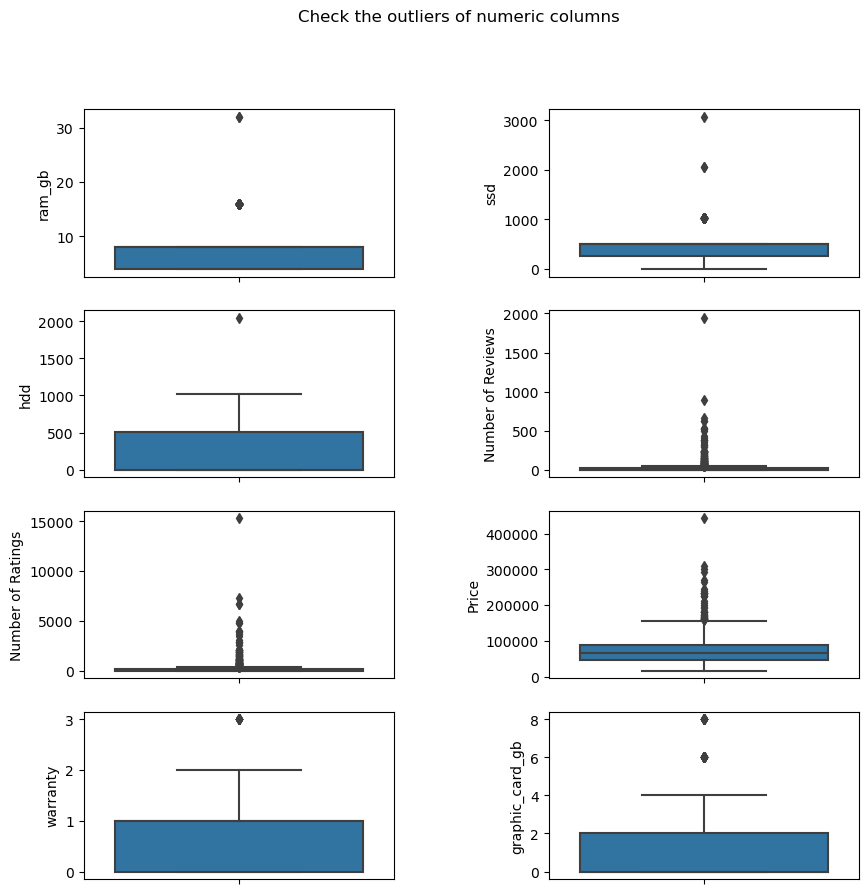

In [2889]:
#check the outliers
fig, axes = plt.subplots(4,2,sharex=True,figsize=(10, 10))
fig.suptitle('Check the outliers of numeric columns')
plt.subplots_adjust(wspace = 0.5)
sns.boxplot(data=electro, y='ram_gb', ax=axes[0,0])
sns.boxplot(data=electro, y='ssd', ax=axes[0,1])
sns.boxplot(data=electro, y='hdd', ax=axes[1,0])
sns.boxplot(data=electro, y='Number of Reviews', ax=axes[1,1])
sns.boxplot(data=electro, y='Number of Ratings', ax=axes[2,0])
sns.boxplot(data=electro, y='Price', ax=axes[2,1])
sns.boxplot(data=electro, y='warranty', ax=axes[3,0])
sns.boxplot(data=electro, y='graphic_card_gb', ax=axes[3,1])
plt.show()

In [2890]:
#drop the outliers
for col in electro.columns:
        #print("capping the ",col)
        if (((electro[col].dtype)=='float') | ((electro[col].dtype)=='int32')|((electro[col].dtype)=='int64')):
            percentiles = electro[col].quantile([0.25,0.75]).values
            iqr= percentiles[1]-percentiles[0]
            electro[col][electro[col] <= percentiles[0]-1.5*iqr] = percentiles[0]
            electro[col][electro[col] >= percentiles[1]+1.5*iqr] = percentiles[1]
        else:
            electro[col]=electro[col]

C:\Users\DELL\AppData\Local\Temp\ipykernel_15680\1582183839.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electro[col][electro[col] <= percentiles[0]-1.5*iqr] = percentiles[0]
C:\Users\DELL\AppData\Local\Temp\ipykernel_15680\1582183839.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electro[col][electro[col] >= percentiles[1]+1.5*iqr] = percentiles[1]
C:\Users\DELL\AppData\Local\Temp\ipykernel_15680\1582183839.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

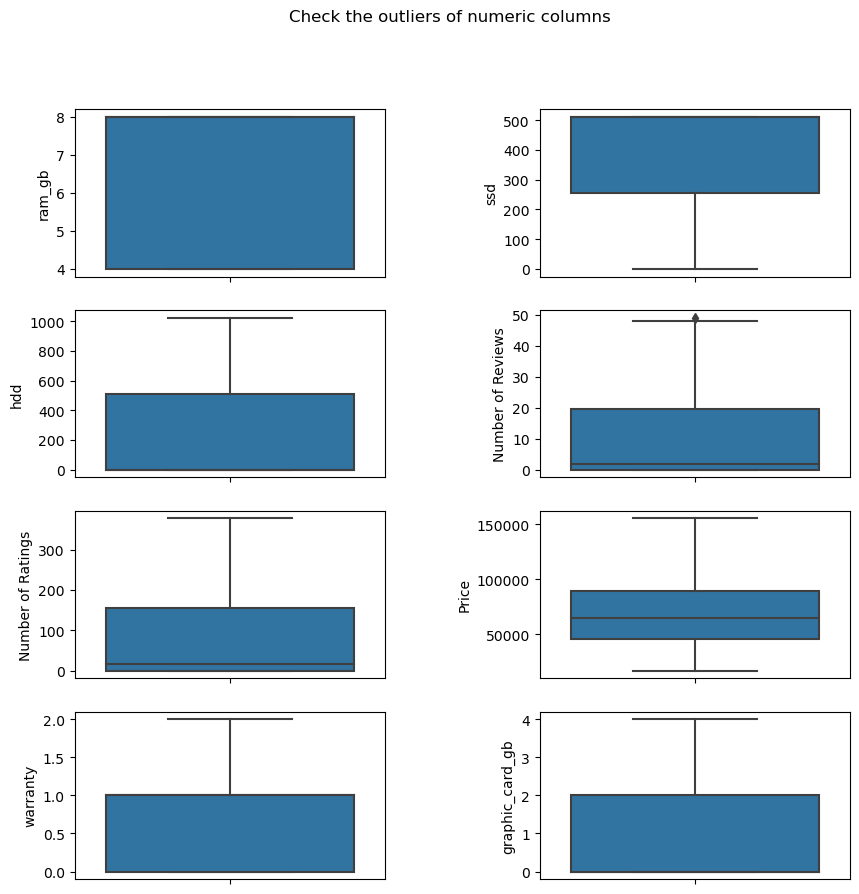

In [2891]:
#check the outliers
fig, axes = plt.subplots(4,2,sharex=True,figsize=(10, 10))
fig.suptitle('Check the outliers of numeric columns')
plt.subplots_adjust(wspace = 0.5)
sns.boxplot(data=electro, y='ram_gb', ax=axes[0,0])
sns.boxplot(data=electro, y='ssd', ax=axes[0,1])
sns.boxplot(data=electro, y='hdd', ax=axes[1,0])
sns.boxplot(data=electro, y='Number of Reviews', ax=axes[1,1])
sns.boxplot(data=electro, y='Number of Ratings', ax=axes[2,0])
sns.boxplot(data=electro, y='Price', ax=axes[2,1])
sns.boxplot(data=electro, y='warranty', ax=axes[3,0])
sns.boxplot(data=electro, y='graphic_card_gb', ax=axes[3,1])
plt.show()

In [2892]:
electro

,processor_gnrtn,ram_gb,ram_type,ssd,hdd,graphic_card_gb,weight,warranty,Price,rating,...,processor_name_Ryzen 9,os_32-bit DOS,os_32-bit Windows,os_64-bit DOS,os_64-bit Mac,os_64-bit Windows,Touchscreen_No,Touchscreen_Yes,msoffice_No,msoffice_Yes
0,11,4,4,0,512,0,0,0,45990,2,...,0,0,0,0,0,1,1,0,1,0
1,10,8,3,0,512,4,0,0,106167,3,...,0,0,0,0,0,1,1,0,1,0
2,11,4,2,0,512,0,0,0,22990,2,...,0,0,0,0,0,1,1,0,1,0
3,11,4,2,256,0,0,0,1,44990,3,...,0,0,0,0,0,1,1,0,0,1
4,11,8,2,512,0,2,0,1,79990,2,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,11,4,2,256,0,0,0,0,39998,3,...,0,0,0,0,0,1,1,0,1,0
719,11,8,2,512,0,0,2,0,44990,2,...,0,0,0,0,0,1,1,0,1,0
720,11,8,2,512,0,0,0,1,64990,3,...,0,0,0,0,0,1,1,0,0,1
721,10,8,3,0,512,2,0,0,89918,3,...,0,0,0,0,0,1,1,0,1,0


In [2893]:
#split to features and result
X = electro.drop(columns=['rating'])
Y = electro['rating']

In [2894]:
#scaler =  MinMaxScaler(feature_range=(0,1))
#X= pd.DataFrame(scaler.fit_transform(X),index=X.index,columns= X.columns)

In [2895]:
X

,processor_gnrtn,ram_gb,ram_type,ssd,hdd,graphic_card_gb,weight,warranty,Price,Number of Ratings,...,processor_name_Ryzen 9,os_32-bit DOS,os_32-bit Windows,os_64-bit DOS,os_64-bit Mac,os_64-bit Windows,Touchscreen_No,Touchscreen_Yes,msoffice_No,msoffice_Yes
0,0.666667,0.0,0.8,0.0,0.5,0.0,0.0,0.0,0.209506,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.333333,1.0,0.6,0.0,0.5,1.0,0.0,0.0,0.644245,0.409814,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.666667,0.0,0.4,0.0,0.5,0.0,0.0,0.0,0.043346,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.666667,0.0,0.4,0.5,0.0,0.0,0.0,0.5,0.202281,0.111406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.666667,1.0,0.4,1.0,0.0,0.5,0.0,0.5,0.455133,0.061008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,0.666667,0.0,0.4,0.5,0.0,0.0,0.0,0.0,0.166218,0.026525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
719,0.666667,1.0,0.4,1.0,0.0,0.0,1.0,0.0,0.202281,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
720,0.666667,1.0,0.4,1.0,0.0,0.0,0.0,0.5,0.346768,0.127321,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
721,0.333333,1.0,0.6,0.0,0.5,0.5,0.0,0.0,0.526856,0.063660,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


C:\Users\DELL\AppData\Local\Temp\ipykernel_15680\3569436995.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = electro.corr()


<function matplotlib.pyplot.show(close=None, block=None)>

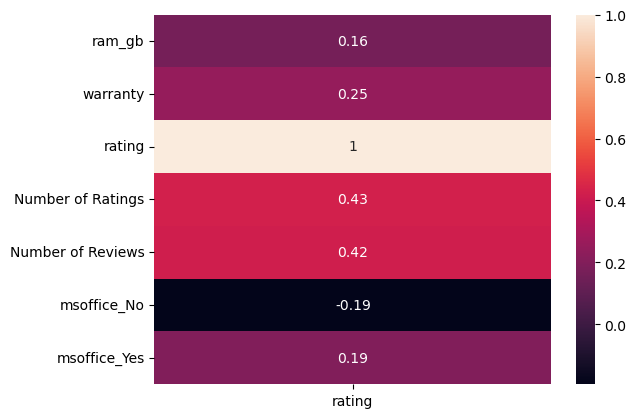

In [2896]:
#check the best features with Y
corr = electro.corr()
top_feature = corr.loc[abs(corr['rating'])>0.15,'rating']
top_feature=pd.DataFrame(top_feature)
sns.heatmap(top_feature,annot=True)
plt.show


In [2897]:
top_feature

,rating
ram_gb,0.164825
warranty,0.253623
rating,1.000000
Number of Ratings,0.430577
Number of Reviews,0.419867
msoffice_No,-0.193959
msoffice_Yes,0.193959


In [2898]:

Y=electro['rating']
#first_X.pop('msoffice_No')
#first_X.pop('rating')
top_feature = top_feature.drop('msoffice_No')
top_feature = top_feature.drop('rating')

#top_feature
first_X= X[top_feature.index]
first_X

,ram_gb,warranty,Number of Ratings,Number of Reviews,msoffice_Yes
0,0.0,0.0,0.000000,0.000000,0.0
1,1.0,0.0,0.409814,0.403061,0.0
2,0.0,0.0,0.000000,0.000000,0.0
3,0.0,0.5,0.111406,0.081633,1.0
4,1.0,0.5,0.061008,0.122449,1.0
...,...,...,...,...,...
718,0.0,0.0,0.026525,0.020408,0.0
719,1.0,0.0,0.000000,0.000000,0.0
720,1.0,0.5,0.127321,0.244898,1.0
721,1.0,0.0,0.063660,0.102041,0.0


In [2899]:
#normalize the data
#scaler =  MinMaxScaler(feature_range=(0,1))
#first_X= pd.DataFrame(scaler.fit_transform(first_X),index=first_X.index,columns=first_X.columns)


In [2900]:
first_X

,ram_gb,warranty,Number of Ratings,Number of Reviews,msoffice_Yes
0,0.0,0.0,0.000000,0.000000,0.0
1,1.0,0.0,0.409814,0.403061,0.0
2,0.0,0.0,0.000000,0.000000,0.0
3,0.0,0.5,0.111406,0.081633,1.0
4,1.0,0.5,0.061008,0.122449,1.0
...,...,...,...,...,...
718,0.0,0.0,0.026525,0.020408,0.0
719,1.0,0.0,0.000000,0.000000,0.0
720,1.0,0.5,0.127321,0.244898,1.0
721,1.0,0.0,0.063660,0.102041,0.0


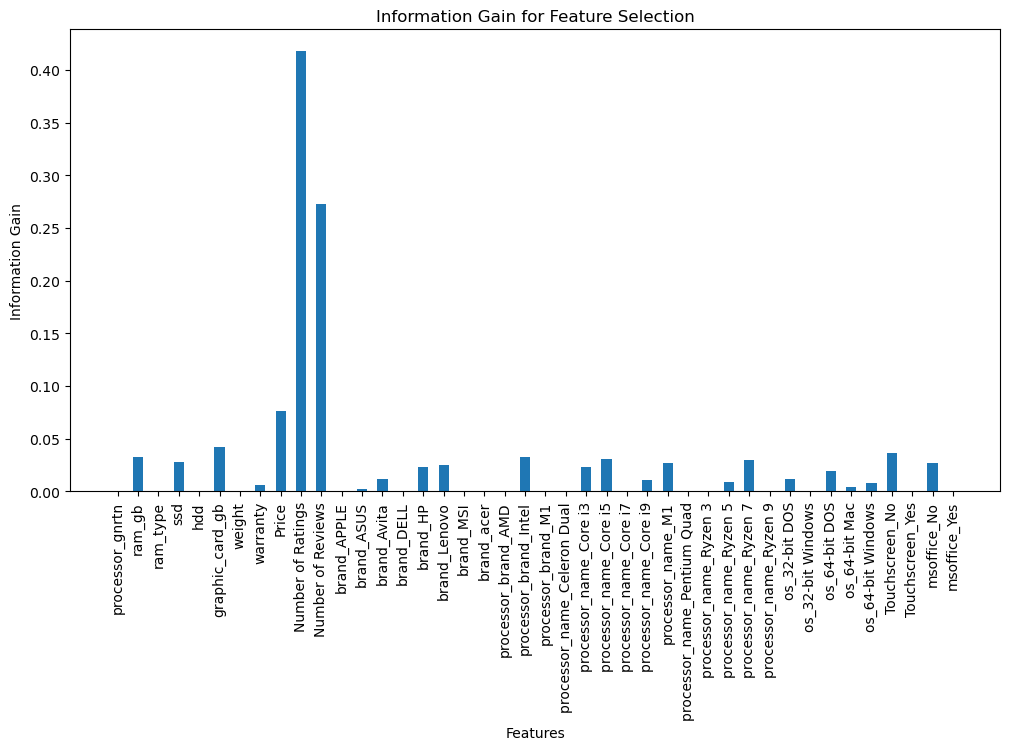

                   Information Gain
Number of Ratings          0.417514
Number of Reviews          0.273224


,Number of Ratings,Number of Reviews
0,0.000000,0.000000
1,0.409814,0.403061
2,0.000000,0.000000
3,0.111406,0.081633
4,0.061008,0.122449
...,...,...
718,0.026525,0.020408
719,0.000000,0.000000
720,0.127321,0.244898
721,0.063660,0.102041


In [2901]:
from sklearn.feature_selection import mutual_info_regression

# Calculate information gain for each feature
info_gain = mutual_info_regression(X, Y)

# Select features with information gain greater than 0.15
top_feature_idx = np.where(info_gain > 0.15)[0]
top_feature_names = X.columns[top_feature_idx]
top_feature_df = pd.DataFrame(data=info_gain[top_feature_idx], index=top_feature_names, columns=['Information Gain'])

plt.figure(figsize=(12, 6))
#plt.barh(X.columns, info_gain, color='skyblue', height=0.6)
plt.bar(X.columns, info_gain,width=0.5)
plt.xticks(rotation = 90)
plt.xlabel('Features')
plt.ylabel('Information Gain')
plt.title('Information Gain for Feature Selection')
plt.show()
print(top_feature_df)
third_feature_selection = X[top_feature_df.index]
third_feature_selection

In [2902]:
#linear regression model
X_train, X_test, y_train, y_test = train_test_split(first_X, Y, test_size=0.3, random_state= 104, shuffle = True)



model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 
y_pred_train = model.predict(X_train)
mse = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Squared Error of train:", mse_train)

print("R^2 Score:", r2)

cv_mse = -cross_val_score(model, first_X, Y, cv=10, scoring='neg_mean_squared_error')
print("Cross-Validation Mean Squared Error:", cv_mse.mean())

cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(model, first_X, Y, 
                         cv=cv)

print("Accuracy : " ,scores.mean())


Mean Squared Error: 0.21176430086641043
Mean Squared Error of train: 0.22717563455005105
R^2 Score: 0.26760025100885365
Cross-Validation Mean Squared Error: 0.2248757160187326
Accuracy :  0.24943858947412903


In [2903]:
#ridge regression model
model = Ridge(alpha=10)
model.fit(X_train, y_train)
y_ridge = model.predict(X_test)
y_ridge_train = model.predict(X_train)
mse_ridge = mean_squared_error(y_test, y_ridge)
mse_ridge_train = mean_squared_error(y_train, y_ridge_train)

r2_ridge = r2_score(y_test, y_ridge)


print("Mean Squared Error:", mse_ridge)
print("Mean Squared Error of train:", mse_ridge_train)
print("R^2 Score:", r2_ridge)

cv_mse_ridge = -cross_val_score(model, first_X, Y, cv=10, scoring='neg_mean_squared_error')
print("Cross-Validation Mean Squared Error:", cv_mse_ridge.mean())

cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, first_X, Y, 
                         cv=cv)

print("Accuracy : " ,scores.mean())


Mean Squared Error: 0.2097920457141532
Mean Squared Error of train: 0.22998201014607103
R^2 Score: 0.2744214157309044
Cross-Validation Mean Squared Error: 0.2255710294048517
Accuracy :  0.24794469796241528


In [2904]:
#lasso regression model
model = Lasso(alpha=0.001)
model.fit(X_train, y_train)
y_lasso = model.predict(X_test)
y_lasso_train = model.predict(X_train)

mse_lasso = mean_squared_error(y_test, y_lasso)
mse_lasso_train = mean_squared_error(y_train, y_lasso_train)

r2_lasso = r2_score(y_test, y_lasso)


print("Mean Squared Error:", mse_lasso)
print("Mean Squared Error of train:", mse_lasso_train)
print("R^2 Score:", r2_lasso)

cv_mse_lasso = -cross_val_score(model, first_X, Y, cv=10, scoring='neg_mean_squared_error')
print("Cross-Validation Mean Squared Error:", cv_mse_lasso.mean())

cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, first_X, Y, 
                         cv=cv)

print("Accuracy : " ,scores.mean())

Mean Squared Error: 0.21209409235477095
Mean Squared Error of train: 0.2272119928441993
R^2 Score: 0.2664596470340268
Cross-Validation Mean Squared Error: 0.22489889994181972
Accuracy :  0.24933187400874215


In [2905]:
#polynomial regression model 
